# Linearized Multi-Sampling Tutorial

In this notebook, we demonstrate how to do image warping/transformation using bilinear and liearized sampler. 


---
## Basic warping

A common image warping function should have 3 main parameters, the input images, the transformation matrix, and the optional output shape, looks like: ```warp_image(image, homography, out_shape=None)```.

Because linearized sampler has some hyper parameters(the number of extra samples, the noise strength, etc.), we encapsule the ```warp_image``` function inside a helper class.

---
let's import everything

In [1]:
import os

import numpy as np
import torch
import matplotlib.pyplot as plt
import imageio

from utils import image_utils
from self_contained_linearized_sampler import warp_helper

---
let's load an image

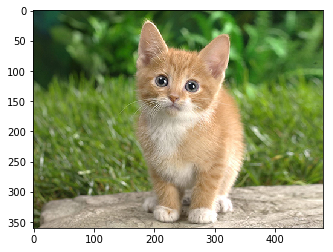

In [2]:
image_path = './notebook_data/cute.jpg'
cute_cat = imageio.imread(image_path)
cute_cat = cute_cat / 255.0
plt.imshow(cute_cat)
plt.show()
# covert np image to torch image
cute_cat = image_utils.np_img_to_torch_img(cute_cat)

---
let's define an transformation matrix and output shape

In [3]:
trans_mat = torch.tensor([[[ 0.6705,  0.4691, -0.1369],
         [-0.4691,  0.6705, -0.0432],
         [ 0.0000,  0.0000,  1.0000]]], device='cpu')
out_shape = [128, 128]

---
let's warp the image using bilinear sampler

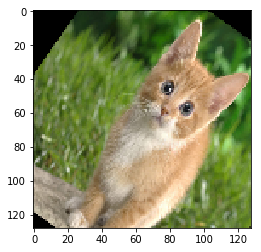

In [4]:
bilinear_sampler = warp_helper.BilinearImageWarpHelper()
bilinear_transformed_image = bilinear_sampler.warp_image(cute_cat, trans_mat, out_shape=out_shape)
# convert torch image to np
bilinear_transformed_image = image_utils.torch_img_to_np_img(bilinear_transformed_image)
plt.imshow(bilinear_transformed_image[0])
plt.show()

---
let's warp the image with linearized sampler.
Note, here we disabled the bias term, which mean the output of linearized sampler is the same as the bilinear sampler, but the gradient flow is linearized.

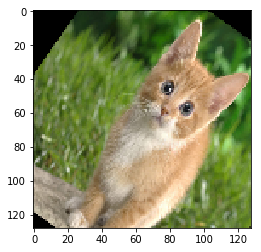

In [5]:
linearized_sampler = warp_helper.LinearizedImageWarpHelper()
linearized_transformed_image = linearized_sampler.warp_image(cute_cat, trans_mat, out_shape=out_shape)
# convert torch image to np
linearized_transformed_image = image_utils.torch_img_to_np_img(linearized_transformed_image)
plt.imshow(linearized_transformed_image[0])
plt.show()

---
if we disable the fixed bias option

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


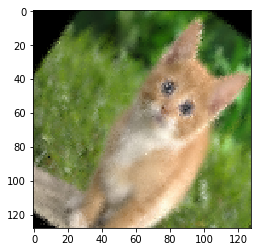

In [6]:
linearized_sampler.fixed_bias = False
linearized_transformed_image = linearized_sampler.warp_image(cute_cat, trans_mat, out_shape=out_shape)
# convert torch image to np
linearized_transformed_image = image_utils.torch_img_to_np_img(linearized_transformed_image)
plt.imshow(linearized_transformed_image[0])
plt.show()

---
## Gradient Visualization

In order to visualize the gradient, we need a transformation with pure translation. We'll do a 10x10 grid search, at each point, we'll compare the translated image with the original image, and get the direction of gradient.

In [7]:
from gradient_visualizer import gradient_visualizer
from options import fake_options

In [8]:
opt = fake_options.FakeOptions()
opt.padding_mode = 'zeros'
opt.grid_size = 10
opt.optim_criterion = 'mse'
opt.optim_lr = 1e-2
opt.out_shape = [32, 32]

gradient_visualizer_instance = gradient_visualizer.GradientVisualizer(opt)

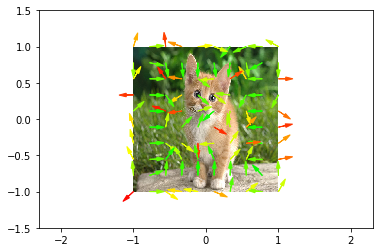

In [9]:
gradient_visualizer_instance.draw_gradient_grid(cute_cat[None], bilinear_sampler)

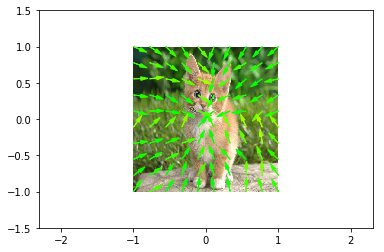

In [10]:
gradient_visualizer_instance.draw_gradient_grid(cute_cat[None], linearized_sampler)

Red arrow means that the gradient at that point is wrong, thee green arrow means correct.